In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

# Business Problem Statement

You have gene expression data from 3,000 patients, where:

- Gene One and Gene Two represent genetic measurements.
- Cancer Present indicates whether the patient has cancer (1 = Yes, 0 = No).

**Objective:**
- The goal is to predict whether a patient has cancer (1) or not (0) based on their gene expression levels using Logistic Regression and K-Nearest Neighbors (KNN) classification models.

**Nomenclature:**

- Feature Variables (X): Gene One, Gene Two (used for prediction).
- Target Variable (y): Cancer Present (1 = Cancer, 0 = No Cancer).



- Logistic Regression: A statistical model that predicts the probability of cancer based on gene data.
- KNN Classifier: A machine learning model that classifies a patient by comparing gene data with similar past cases.
- Accuracy Score: A metric that measures how well the model correctly predicts cancer presence.

In [158]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\ML_data\gene_expression.csv")

# Data Understanding

In [159]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


**Observation**

- Gene One (numeric, float)
- Gene Two (numeric, float)
- Cancer Present (numeric, integer, likely a classification label: 0 or 1)
- All columns have no missing values, and the dataset

# Data Exploration

In [161]:
df.shape

(3000, 3)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [163]:
for i in df:
    print(i , " : ", df[i].unique())
    print("===================================")

Gene One  :  [ 4.3  2.5  5.7  6.1  7.4  3.4  3.1  6.3  5.5  7.7  6.6  5.4  5.2  8.3
  4.2  3.   4.9  8.5  7.2  3.3  9.3  7.8  2.4  6.4  3.6  4.6  9.7  5.
  6.8  5.9  6.2  6.7  4.8  3.5  6.9  6.5  2.7  3.9  8.4  3.7  4.1  7.1
  2.6  1.8  4.7  8.9  8.6  7.6  9.1  4.5  4.   7.3  2.8  2.9  5.6  4.4
  7.5  8.2  9.   5.8  3.2  9.4  2.2  6.   5.3  5.1  7.   8.8  8.7  2.3
  3.8  7.9  8.1  9.2  2.   9.5  1.9  1.6  8.   1.5  2.1  1.2  1.   9.6
  1.7  9.9 10.   9.8  1.3]
Gene Two  :  [ 3.9  6.3  6.2  3.4  7.5  6.8  4.9  8.6  3.5  2.9  4.5  7.2  5.7  5.4
  9.3  7.7  5.6  4.2  3.7  5.3  6.4  5.   6.9  6.5  4.8  3.2  6.1  7.3
  5.1  2.3  4.1  4.6  7.8  2.5  6.   6.6  8.4  8.8  7.1  4.7  4.   3.8
  5.5  2.4  4.3  7.   3.6  7.4  2.1  8.2  3.3  6.7  7.6  3.1  9.1  8.5
  1.8  5.9  2.6  4.4  5.2  2.8  5.8  3.   8.3  7.9  2.7  8.1  9.4  8.
  2.2  1.9  1.2  9.   8.7  1.   1.4  1.6  1.5  9.2  2.   1.7  8.9  9.8
  9.6  9.5  9.7 10. ]
Cancer Present  :  [1 0]


In [164]:
df.columns.tolist()

['Gene One', 'Gene Two', 'Cancer Present']

- correct the syntax remove spaces by ('_')

In [165]:
df = df.rename(columns = {'Gene One' : 'Gene_One', 'Gene Two' : 'Gene_Two', 'Cancer Present' : 'Cancer_Present'})


In [166]:
df.columns.tolist()


['Gene_One', 'Gene_Two', 'Cancer_Present']

In [167]:
continous = ['Gene_One', 'Gene_Two']
count = ['Cancer_Present']

In [168]:
df.columns

Index(['Gene_One', 'Gene_Two', 'Cancer_Present'], dtype='object')

In [169]:
df[continous].skew()

Gene_One    0.027042
Gene_Two    0.002871
dtype: float64

**Data is normally distributed no skewed data**

# visualization

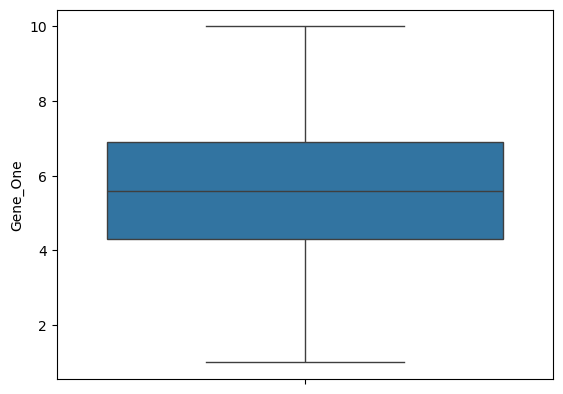

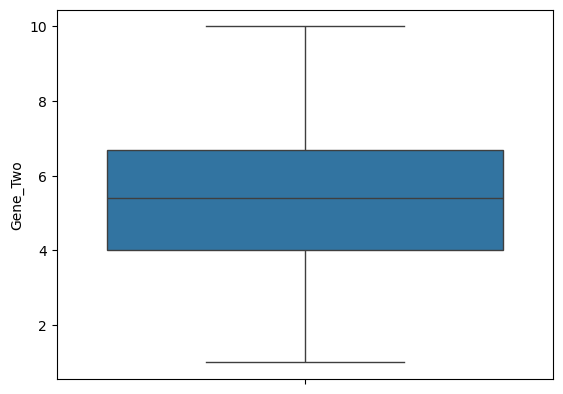

In [170]:
for i in continous:
    sns.boxplot(df[i])
    plt.show()

**No outliers present in datasset**

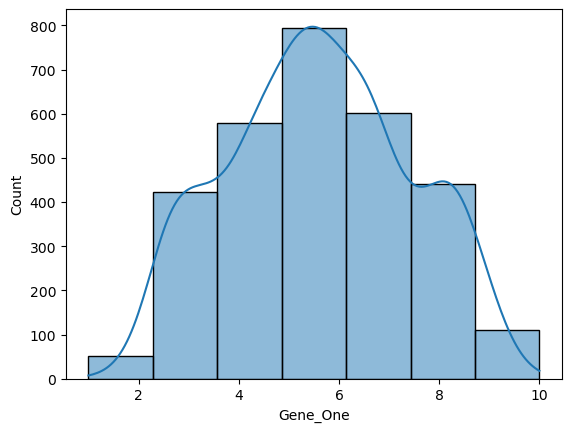

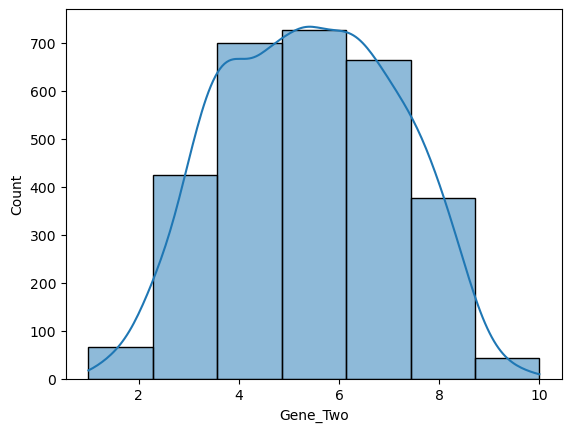

In [171]:
for i in continous:
    sns.histplot(df[i], bins = 7, kde = True)
    plt.show()

**Data is normally distributed**

In [172]:
df[count].value_counts()

Cancer_Present
0                 1500
1                 1500
Name: count, dtype: int64

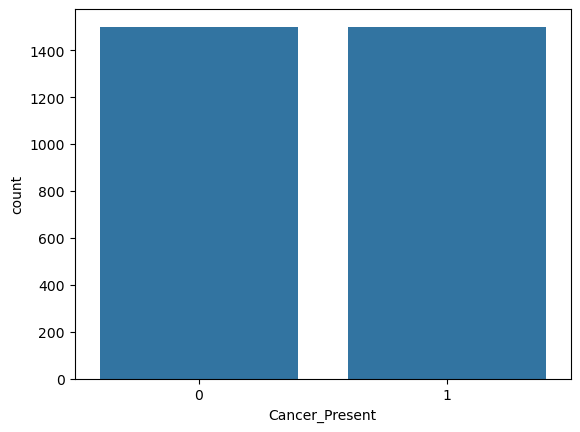

In [173]:
for i in count:
    sns.countplot(x = df[i])
    plt.show()

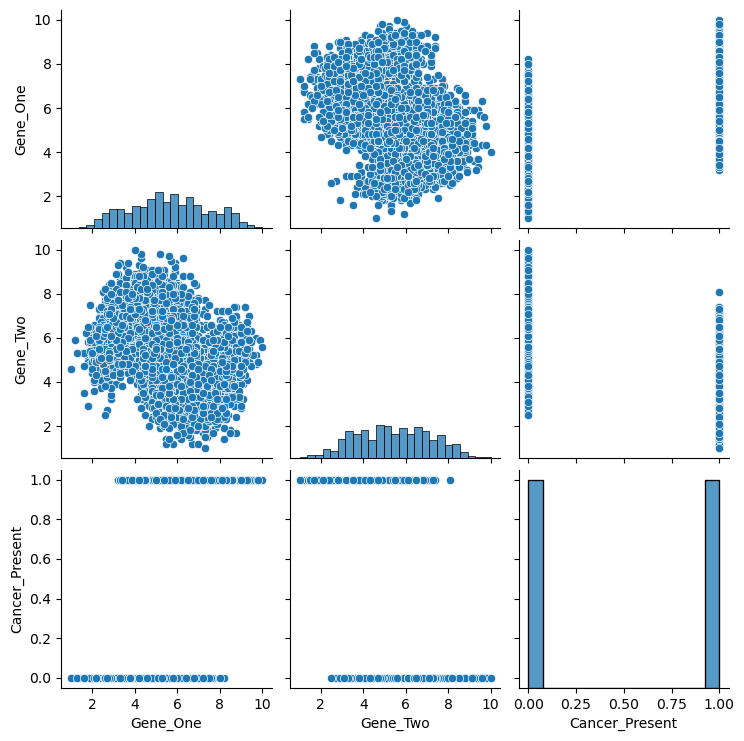

In [174]:
sns.pairplot(df)

# Data Preprocessing

In [175]:
df.head()

,Gene_One,Gene_Two,Cancer_Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


- No wrong data present

In [176]:
df.dtypes

Gene_One          float64
Gene_Two          float64
Cancer_Present      int64
dtype: object

- All datatypes in correct format no need to change

In [177]:
df.duplicated().sum()


862

In [178]:
df = df.drop_duplicates()

In [179]:
df.shape

(2138, 3)

In [180]:
df.isnull().sum()

Gene_One          0
Gene_Two          0
Cancer_Present    0
dtype: int64

In [181]:
df.skew()

Gene_One          0.023016
Gene_Two         -0.010543
Cancer_Present    0.013106
dtype: float64

- All columns are normally distributed
- no outliers present

In [182]:
# No data wrangling needed

In [183]:
df[continous].describe()

,Gene_One,Gene_Two
count,2138.000000,2138.000000
mean,5.590365,5.405285
std,1.859242,1.749803
min,1.000000,1.000000
25%,4.200000,4.100000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [184]:
# No need data cleaning

In [185]:
X = df.drop(columns = ['Cancer_Present'])
y = df['Cancer_Present']

# Best Random State value

In [186]:
Train = []

CV = []

for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)

    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train, ypred_train))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model, X_train, y_train, cv = 5).mean())

em = pd.DataFrame({"Train" : Train, "CV" : CV})
gm = em[abs(em['Train'] - em['CV'] <= 0.05)]
rs = gm[gm['CV'] == gm["CV"].max()].index.tolist()[0]
print("BEST RANDOM STATE NUMBER IS : ", rs)

BEST RANDOM STATE NUMBER IS :  2


# Save cleaned Data

In [187]:
df.to_csv('cleaned_dataset_Gene.csv', index=False)